# HM 878 Applied Biostatistics Problem Set #1b

## T-tests, ANOVA, Chi-Square, Correlation, Simple and Multivariate Linear Regression

*This Problem Set will provide students with the opportunity to learn how to use R to conduct basic statistical tests, replicating many tests that were already done in HM 802. The main goal is to make
sure you are familiar with R as a system for statistical analysis. Again, output from SPSS from HM 802 is included for comparison.*

Analyses include:

-   Independent t-test
-   ANOVA
-   Chi-square
-   Correlation
-   Simple and multivariate linear regression

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

*Setting up the code environment*

In [1]:
library(car) 
library(dplyr)
library(tidyverse)
library(rstatix)

Warning message:
"package 'car' was built under R version 4.2.3"
Loading required package: carData


Attaching package: 'dplyr'


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.1.8
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Question 1

Is there a difference in knowledge scores between groups based on sex? Data: COVID-19 Knowledge.csv. Variables: Male and Knowledge Score. Use R to conduct an independent samples t-test using "Male" as
the grouping variable, and "Knowledge Score" as the dependent variable. Calculate and report the appropriate descriptive statistics, and include the Levene's test for equality of variances.

In [2]:
df = read.csv("C:\\Users\\ljens\\Downloads\\COVID-19 Knowledge, Attitudes, and Behaviors.csv")

In [4]:
df$Male <- factor(df$Male)

In [5]:
df[df$Male == 'Male','KnowledgeScore'] |> summary(KnowledgeScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   9.000  10.000   9.517  11.000  12.000 

In [6]:
df[df$Male == 'Female','KnowledgeScore'] |> summary(KnowledgeScore)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00    9.00   10.00   10.01   11.00   12.00 

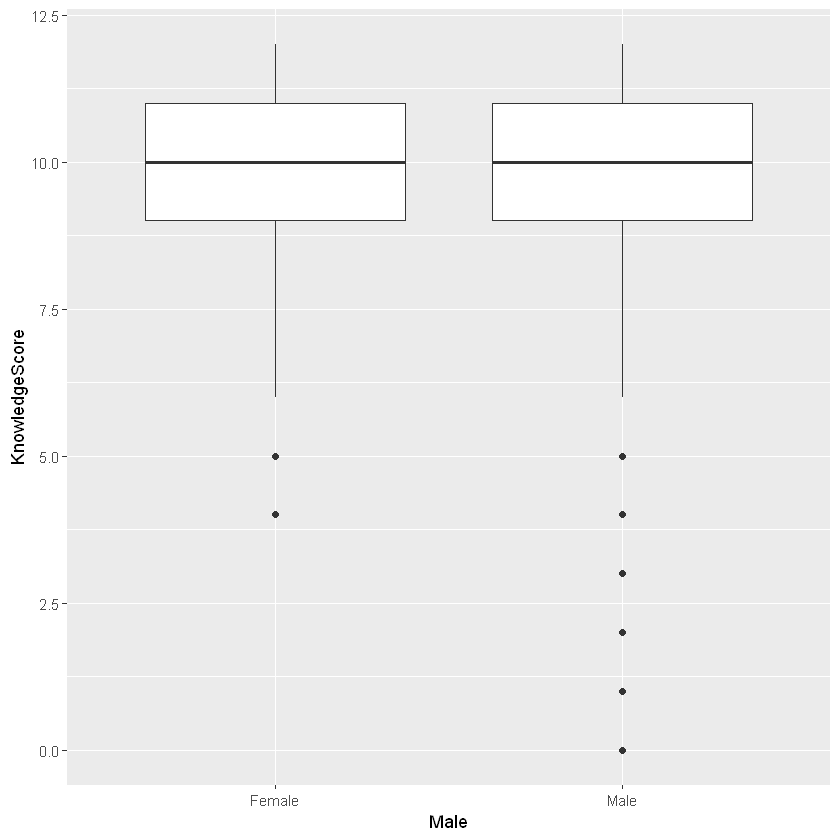

In [7]:
ggplot(data = df, aes(x=Male, y=KnowledgeScore)) + 
  geom_boxplot()

Levene’s Test is performed to check for homogeneity of KnowledgeScore variances between Males and Females.

Null hypothesis: KnowledgeScore variance is equal between the groups.

Alt hypothesis: KnowledgeScore variance is different between the groups.

alpha = 0.05

In [8]:
leveneTest(KnowledgeScore ~ Male, df)


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,10.79294,0.001053159
,1032,NA,NA


Levene’s test returned p = 0.001, so null is rejected. Mean variances are not homogeneous. We proceed to the t-test.

Null hypothesis: There’s no difference in KnowledgeScore means between the two measured genders

Alt hypothesis: Mean KnowledgeScore differs between the two measured genders.

alpha = 0.05

In [15]:
t = t.test(df$KnowledgeScore ~ df$Male, var.equal=FALSE)


In [16]:
t


	Welch Two Sample t-test

data:  df$KnowledgeScore by df$Male
t = 4.1835, df = 1014.3, p-value = 3.119e-05
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 0.2603405 0.7203258
sample estimates:
mean in group Female   mean in group Male 
           10.006944             9.516611 


In [16]:
print(paste('Female Mean: ',as.character(t$estimate)[1]))


[1] "Female Mean:  10.0069444444444"


In [17]:
print(paste('Male Mean: ',as.character(t$estimate)[2]))


[1] "Male Mean:  9.51661129568106"


In [18]:
print(paste('p-value: ',as.character(t$p.value)))


[1] "p-value:  3.11851265227345e-05"


The p-value is lower than alpha, so the null is rejected and we assume that there is a significant difference in mean knowledge scores between the two measured genders.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Question 2

Is there a difference in knowledge scores among groups based on generational categories? Data: COVID-19 Knowledge.csv. Variables: Generations and Knowledge Score. Use R to conduct an ANOVA using
"Generations" as the grouping variable, and "Knowledge Score" as the dependent variable. Generate appropriate descriptive stats, and if applicable, generate and interpret post hoc tests.

In [17]:
aggregate(KnowledgeScore ~ Generations, data=df, function(x) round(c(mean=mean(x), sd=sd(x))))

Generations,KnowledgeScore
<chr>,"<dbl[,2]>"
Baby Boomers,"11, 1"
Gen X,"10, 2"
Gen Z,"9, 2"
Millenials,"10, 2"


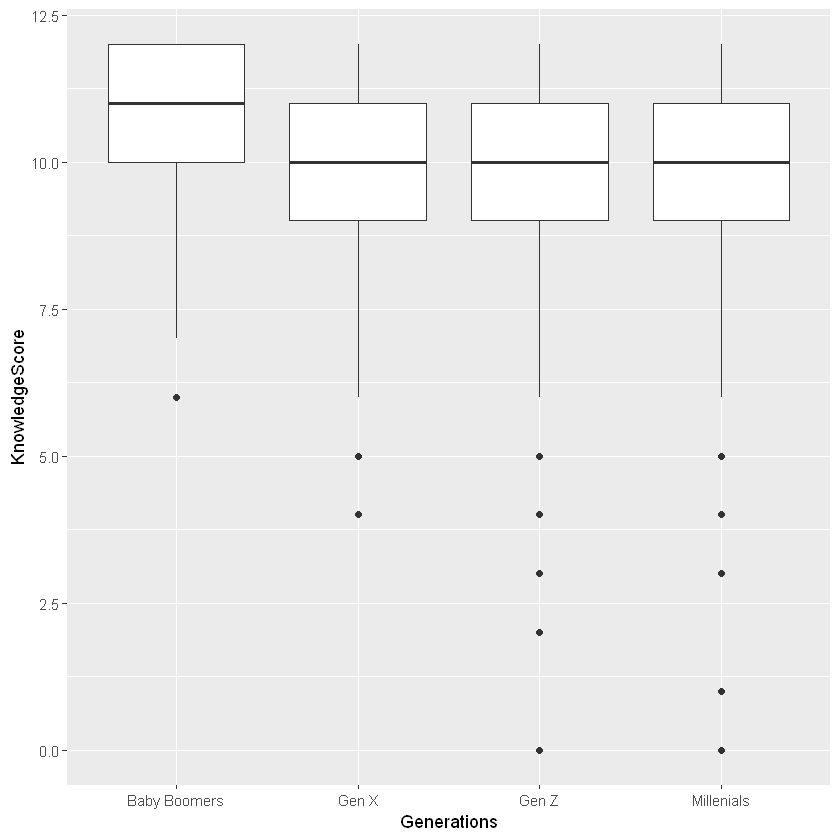

In [18]:
ggplot(data = df, aes(x=Generations, y=KnowledgeScore)) + 
  geom_boxplot()

In [19]:
nova = aov(KnowledgeScore ~ Generations, data = df)

In [20]:
nova

Call:
   aov(formula = KnowledgeScore ~ Generations, data = df)

Terms:
                Generations Residuals
Sum of Squares      100.714  3765.069
Deg. of Freedom           3      1030

Residual standard error: 1.911912
Estimated effects may be unbalanced

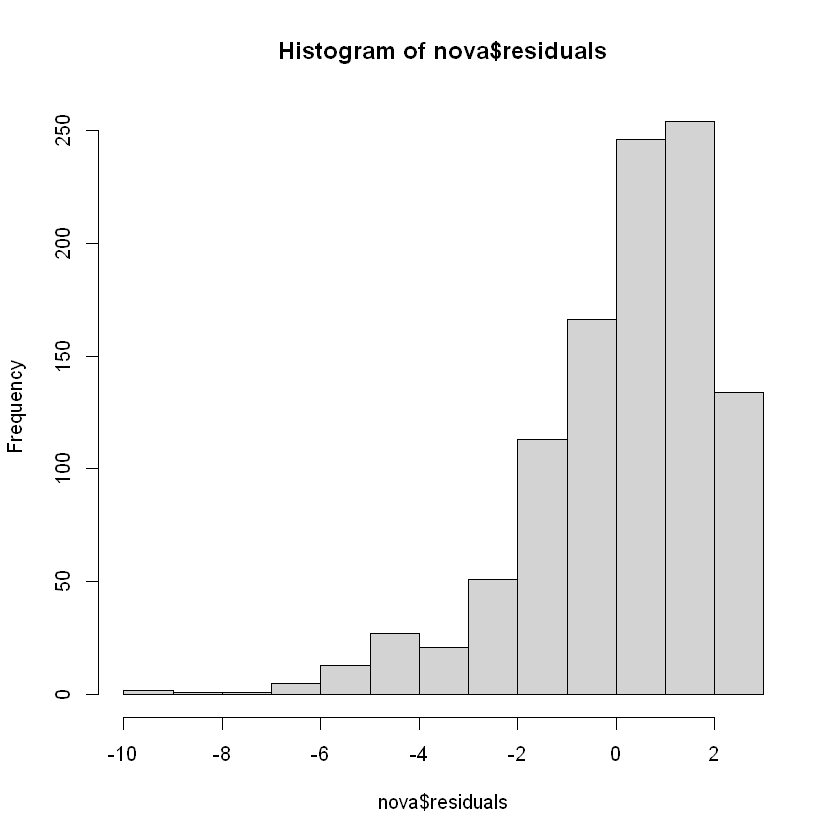

In [8]:
hist(nova$residuals)

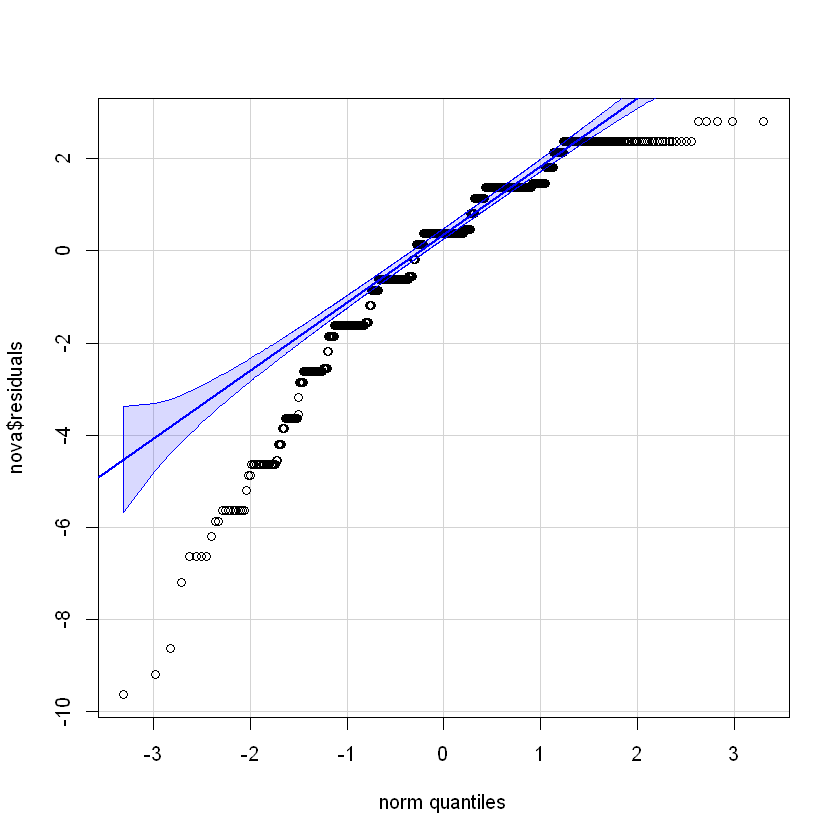

In [9]:
qqPlot(nova$residuals, id=FALSE)


In [10]:
shapiro.test(nova$residuals)



	Shapiro-Wilk normality test

data:  nova$residuals
W = 0.90133, p-value < 2.2e-16


In [20]:
summary(nova)


              Df Sum Sq Mean Sq F value   Pr(>F)    
Generations    3    101   33.57   9.184 5.34e-06 ***
Residuals   1030   3765    3.66                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [21]:
TukeyHSD(nova)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = KnowledgeScore ~ Generations, data = df)

$Generations
                              diff        lwr         upr     p adj
Gen X-Baby Boomers      -0.6837912 -1.3206758 -0.04690664 0.0297174
Gen Z-Baby Boomers      -1.3562961 -2.1074952 -0.60509705 0.0000227
Millenials-Baby Boomers -0.9204619 -1.4366902 -0.40423354 0.0000297
Gen Z-Gen X             -0.6725049 -1.3827543  0.03774447 0.0710040
Millenials-Gen X        -0.2366707 -0.6912538  0.21791248 0.5377678
Millenials-Gen Z         0.4358342 -0.1685861  1.04025453 0.2481295


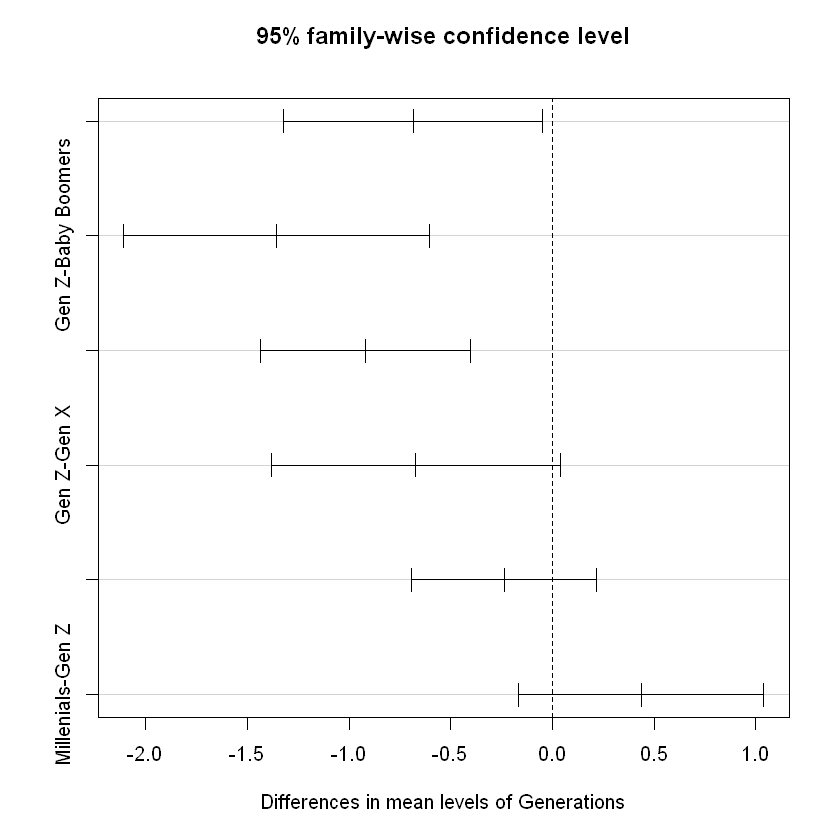

In [22]:
plot(TukeyHSD(nova))


Significant differences are seen between Boomers and basically every other generation. In other words, Boomers had higher Knowledge Scores than every other generation.

In [26]:
games_howell_test(df, KnowledgeScore ~ Generations, conf.level = 0.95, detailed = FALSE)

,.y.,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,KnowledgeScore,Baby Boomers,Gen X,-0.6837912,-1.2183066,-0.1492759,6.00e-03,**
2,KnowledgeScore,Baby Boomers,Gen Z,-1.3562961,-2.1816282,-0.5309640,2.26e-04,***
3,KnowledgeScore,Baby Boomers,Millenials,-0.9204619,-1.3418489,-0.4990749,3.88e-07,****
4,KnowledgeScore,Gen X,Gen Z,-0.6725049,-1.4997496,0.1547398,1.53e-01,ns
5,KnowledgeScore,Gen X,Millenials,-0.2366707,-0.6611437,0.1878024,4.74e-01,ns
6,KnowledgeScore,Gen Z,Millenials,0.4358342,-0.3255453,1.1972138,4.41e-01,ns


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Question 3

Is there an association between political party ideology/identification and whether respondents report that COVID-19 will be successfully controlled? Data: COVID-19 Knowledge.csv. Variables: RepDemInd
and SuccessControl. Use R to conduct a chi-square analysis to determine if there is an association between the two variables.


In [27]:
df = read.csv("C:\\Users\\ljens\\Downloads\\COVID-19 Knowledge.csv")


In [34]:
df = df |> mutate(RepDemInd = as.character(factor(RepDemInd)))


In [33]:
df = df |> mutate(SuccessControl = as.character(factor(SuccessControl)))


In [37]:
print(table(df$RepDemInd, df$SuccessControl))

   
      1   2   3   4   5
  1 123 112  28  13  13
  2 118 201 105  51  12
  3  55 132  43  19   9


Null hypothesis: No association between political ideology and predicted COVID control.

Alt hypothesis: Political ideology and predicted COVID control are associated.

alpha = 0.05

In [39]:
summary(table(df$RepDemInd, df$SuccessControl))

Number of cases in table: 1034 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 58.87, df = 8, p-value = 7.777e-10

In [38]:
chisq.test(x=df$RepDemInd, y=df$SuccessControl, correct=FALSE)



	Pearson's Chi-squared test

data:  df$RepDemInd and df$SuccessControl
X-squared = 58.866, df = 8, p-value = 7.777e-10


P-value is lower than alpha, so we reject the null and assume that the two variables are associated.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Question 4

Is there a correlation between the number of cigarettes smoked per day and BMI? Data: Cigarettes Smoked_BMI.csv. Variable: CigarettesSmoked and BMI. Using R, calculate a correlation coefficient and
determine statistical significance. Second, using R, conduct a simple linear regression to predict BMI using CigarettesSmoked.

In [41]:
df = read.csv("C:\\Users\\ljens\\Downloads\\Cigarettes Smoked_BMI.csv")


Testing normality of CigarettesSmoked (not normal).



In [31]:
shapiro.test(df$CigarettesSmoked)



	Shapiro-Wilk normality test

data:  df$CigarettesSmoked
W = 0.95968, p-value = 0.816


Testing normality of BMI (not normal)



In [32]:
shapiro.test(df$BMI)



	Shapiro-Wilk normality test

data:  df$BMI
W = 0.94087, p-value = 0.6466


Using Pearson’s test to test for correlation between CigarettesSmoked and BMI



In [33]:
cor.test(x=df$CigarettesSmoked, y=df$BMI, method="pearson")



	Pearson's product-moment correlation

data:  df$CigarettesSmoked and df$BMI
t = 4.3126, df = 5, p-value = 0.007624
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4063894 0.9833888
sample estimates:
      cor 
0.8877615 


In [34]:
print(paste("Pearson Correlation Coefficient: ", as.character(cor.test(x=df$CigarettesSmoked, y=df$BMI, method="pearson")$estimate)))

[1] "Pearson Correlation Coefficient:  0.887761545248006"


In [35]:
print(paste("Pearson P-Value: ", as.character(cor.test(x=df$CigarettesSmoked, y=df$BMI, method="pearson")$p.value)))


[1] "Pearson P-Value:  0.00762398969022782"


As stated, the two variables have statistically significant correlation.

Let’s see how the relationship looks in a chart.



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


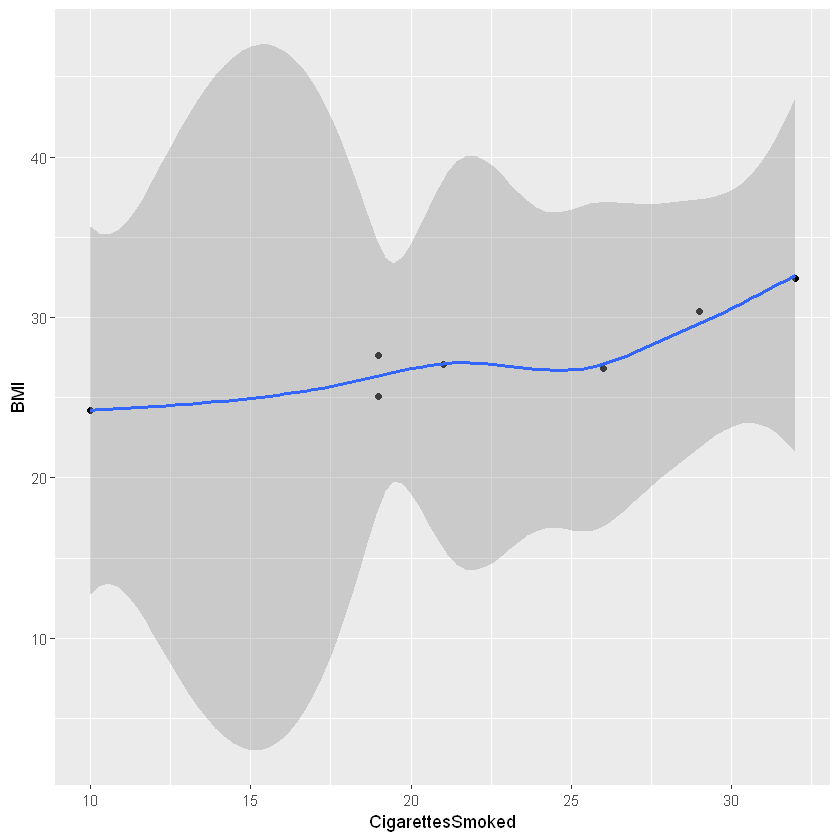

In [36]:
ggplot(df, aes(x=CigarettesSmoked, y=BMI)) +
  geom_point() +
  stat_smooth()

In [37]:
model = lm(BMI ~ CigarettesSmoked, data = df)


In [38]:
corr.coef = model$coefficients[2]


In [39]:
corr.incpt = model$coefficients[1]


In [40]:
print(paste('Linear Model: BMI = ', corr.coef, '* CigarettesSmoked + ', corr.incpt ))


[1] "Linear Model: BMI =  0.345375218150087 * CigarettesSmoked +  19.9602094240838"


Each (daily?) cigarette smoked increased BMI by 0.35



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Question 5

Run a Multiple Linear Regression. Data: Multiple Linear Regression Data, with Dependent variable: BMI5. Independent variables: HLTHPLN1, RFSMOK3, VEGESU1, and SEX. Remember to test for assumptions for
doing a linear regression: equality of variances, multicollinearity, and outliers in the dependent variables. When doing the linear regression remember to also generate Collinearity Statistics and
VIF, as well as a Normal P-P Plot to test for normality of residuals.


In [43]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\Multiple Linear Regression Data.csv")

In [44]:
colnames(df)

[1] "BMI5"     "SEX"      "VEGESU1"  "RFSMOK3"  "HLTHPLN1"

In [48]:
m <- lm(BMI5 ~ HLTHPLN1 + RFSMOK3 + VEGESU1 + SEX, data = df)

In [49]:
m


Call:
lm(formula = BMI5 ~ HLTHPLN1 + RFSMOK3 + VEGESU1 + SEX, data = df)

Coefficients:
(Intercept)     HLTHPLN1      RFSMOK3      VEGESU1          SEX  
   28.33762     -0.16289     -0.21248     -0.05257      0.36618  


In [50]:
summary(m)


Call:
lm(formula = BMI5 ~ HLTHPLN1 + RFSMOK3 + VEGESU1 + SEX, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.522  -4.237  -1.102   3.050  71.403 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 28.337621   0.026376 1074.390  < 2e-16 ***
HLTHPLN1    -0.162886   0.022378   -7.279 3.37e-13 ***
RFSMOK3     -0.212477   0.014747  -14.409  < 2e-16 ***
VEGESU1     -0.052570   0.003251  -16.171  < 2e-16 ***
SEX          0.366175   0.019228   19.043  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.277 on 379010 degrees of freedom
  (71001 observations deleted due to missingness)
Multiple R-squared:  0.002334,	Adjusted R-squared:  0.002324 
F-statistic: 221.7 on 4 and 379010 DF,  p-value: < 2.2e-16


In [52]:
print(vif(m))

HLTHPLN1  RFSMOK3  VEGESU1      SEX 
1.001096 1.001178 1.000677 1.000928 


In [62]:
print(aov(m))

Call:
   aov(formula = m)

Terms:
                HLTHPLN1  RFSMOK3  VEGESU1      SEX Residuals
Sum of Squares      1994     7749    10913    14291  14935139
Deg. of Freedom        1        1        1        1    379010

Residual standard error: 6.277393
Estimated effects may be unbalanced
71001 observations deleted due to missingness


In [63]:
summary(aov(m))

                Df   Sum Sq Mean Sq F value   Pr(>F)    
HLTHPLN1         1     1994    1994    50.6 1.14e-12 ***
RFSMOK3          1     7749    7749   196.6  < 2e-16 ***
VEGESU1          1    10913   10913   276.9  < 2e-16 ***
SEX              1    14291   14291   362.7  < 2e-16 ***
Residuals   379010 14935139      39                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
71001 observations deleted due to missingness

In [59]:
nova <- aov(m)

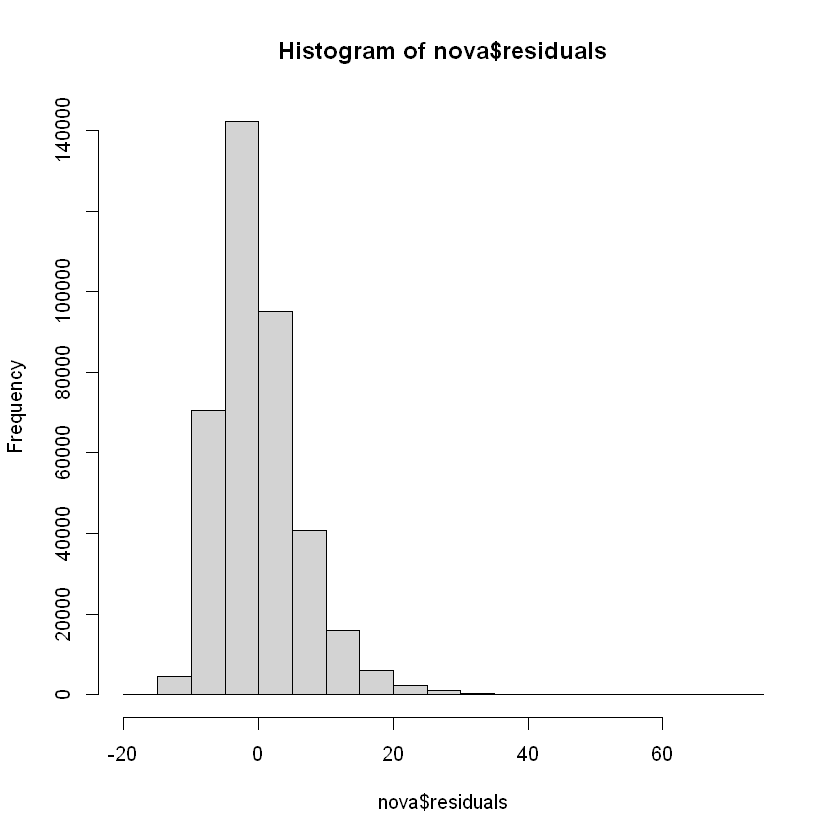

In [60]:
hist(nova$residuals)

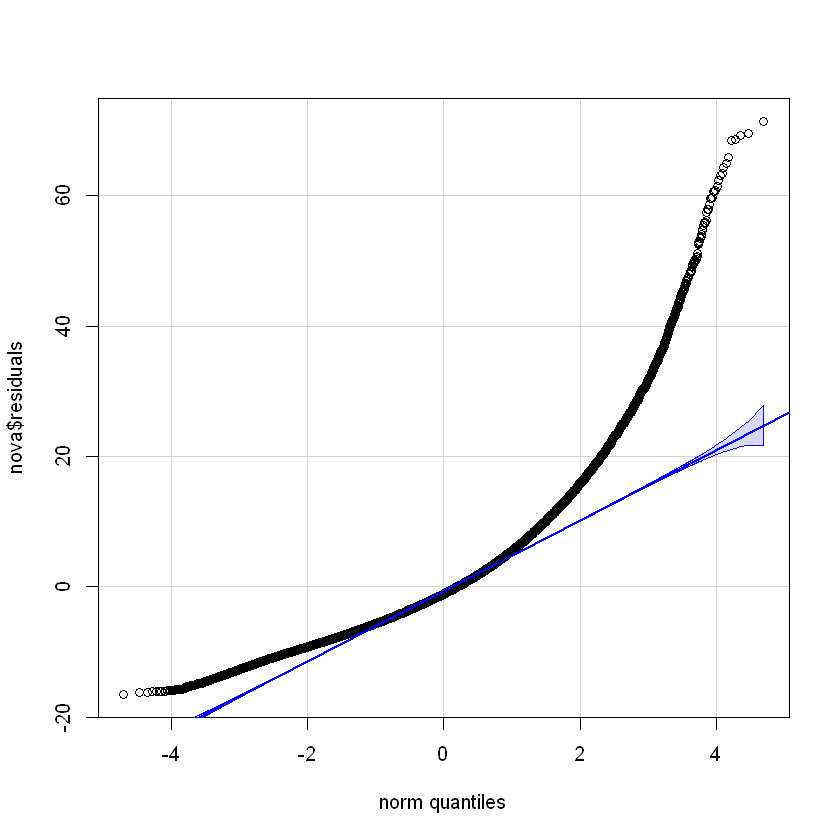

In [64]:
qqPlot(nova$residuals, id=FALSE)